In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
SOURCE_PATH='/home/harsha/Downloads/pandas-master/'
breast_cancer=SOURCE_PATH+'/'+'breast_cancer.csv'
adult=SOURCE_PATH+'/'+'adult10.data'
book_price=SOURCE_PATH+'/'+'book_price_data.xlsx'
book_reviews=SOURCE_PATH+'/'+'book_reviews_price.xlsx'
hp_costs=SOURCE_PATH+'/'+'hp_other_costs.csv'
house_price_bangalore=SOURCE_PATH+'/'+'house_price_bangalore.csv'
mt_cars=SOURCE_PATH+'/'+'mtcars.csv'
mt_cars_missing=SOURCE_PATH+'/'+'mtcars_missing.csv'
wine_quality=SOURCE_PATH+'/'+'winequality.csv'
sales_return=SOURCE_PATH+'/'+'sales_returns.csv'
superstores_order=SOURCE_PATH+'/'+'superstore_orders.csv'
car_sales=SOURCE_PATH+'/'+'car-sales.csv'

## Extracting data with regular expressions.

In [48]:
df=pd.read_csv(hp_costs)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,other_costs,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,custom 2.0L reg 1.76L misc 3.7L,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,custom 2.4L reg 5.4L,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,reg 2.79L misc 3.5L,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,custom 2.5L reg 4.28L pd 1.34L misc 1.6L,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,reg 2.3L,51.00


In [25]:
df['other_cost']=df['other_costs'].str.findall('\d+.\d+')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,other_costs,price,other_cost
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,custom 2.0L reg 1.76L misc 3.7L,39.07,"[2.0, 1.76, 3.7]"
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,custom 2.4L reg 5.4L,120.00,"[2.4, 5.4]"
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,reg 2.79L misc 3.5L,62.00,"[2.79, 3.5]"
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,custom 2.5L reg 4.28L pd 1.34L misc 1.6L,95.00,"[2.5, 4.28, 1.34, 1.6]"
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,reg 2.3L,51.00,[2.3]


In [27]:
for i,row in df.iterrows():
    df.loc[i,'total_cost']=row['price']+sum([float(x) for x in row['other_cost']])

In [29]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,other_costs,price,other_cost,total_cost
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,custom 2.0L reg 1.76L misc 3.7L,39.07,"[2.0, 1.76, 3.7]",46.53
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,custom 2.4L reg 5.4L,120.00,"[2.4, 5.4]",127.80
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,reg 2.79L misc 3.5L,62.00,"[2.79, 3.5]",68.29
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,custom 2.5L reg 4.28L pd 1.34L misc 1.6L,95.00,"[2.5, 4.28, 1.34, 1.6]",104.72
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,reg 2.3L,51.00,[2.3],53.30


## Pivot tables

In [32]:
df=pd.read_csv(superstores_order)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [34]:
df.pivot_table(index='category',columns='region',values='sales',aggfunc='sum')

region,Central,East,South,West
category,,,,
Furniture,163797.1638,208291.204,117298.684,252612.7435
Office Supplies,167026.4150,205516.055,125651.313,220853.2490
Technology,170416.3120,264973.981,148771.908,251991.8320


In [40]:
df.pivot_table(index=['category','sub_category'],columns='region',values=['profit','sales'],aggfunc='sum').style.background_gradient(cmap='viridis')

##  Pandas cut method, continous to categorical data.

In [41]:
df=pd.read_csv(wine_quality,delimiter=';')
df.tail()

,fixed-acidity,volatile-acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [42]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [43]:
df['quality_category']=pd.cut(df['quality'],bins=[0,3,6,9],labels=['bad','average','good'])

In [45]:
df['quality_category'].value_counts()

average    3818
good       1060
bad          20
Name: quality_category, dtype: int64

In [47]:
## 0-3  =  20
## 4-6  = 163+1457+2198
## 7-10 = 880+175+5

## Split strings to columns and expand.

In [76]:
df=pd.read_excel(book_reviews)
df.tail()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
95,Coming Round the Mountain: In the Year of Inde...,Ruskin Bond,5.0 out of 5 stars,13 customer reviews,"'It was 1947, and life was about to change qui...",Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",150.00
96,Indian Sign Language (Native American),William Tomkins,4.0 out of 5 stars,2 customer reviews,Plains Indians from different tribes speaking ...,Sign Language Reference,Humour,350.00
97,Tim Cook,Leander Kahney,3.5 out of 5 stars,2 customer reviews,"In 2011, Tim cook took on an impossible task -...",Engineering & Technology (Books),"Biographies, Diaries & True Accounts",434.00
98,On Photography (Penguin Modern Classics),Susan Sontag,4.5 out of 5 stars,9 customer reviews,Susan Sontag's On Photography is a seminal and...,"Arts History, Theory & Criticism (Books)","Arts, Film & Photography",423.24
99,Sap Hr Personnel Administration and Recruitmen...,Agrawal P.K,5.0 out of 5 stars,2 customer reviews,SAP is a great software. One needs to fully un...,Business Communication,"Computing, Internet & Digital Media",449.00


In [77]:
df['Author'].value_counts()

M S Ashokan                      2
Agatha Christie                  2
Editors of Life                  1
Susan Sontag                     1
Geoff Dyer                       1
                                ..
Rajiv Malhotra                   1
Sivananda Yoga Vedanta Centre    1
Shantanu Guha Ray                1
Adam Juniper                     1
Alex Honnold                     1
Name: Author, Length: 98, dtype: int64

In [78]:
df['Author_First_Name']=df['Author'].str.split(n=1,expand=True)[0]
df['Author_Last_Name']=df['Author'].str.split(n=1,expand=True)[1]

In [79]:
df.tail()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Author_First_Name,Author_Last_Name
95,Coming Round the Mountain: In the Year of Inde...,Ruskin Bond,5.0 out of 5 stars,13 customer reviews,"'It was 1947, and life was about to change qui...",Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",150.00,Ruskin,Bond
96,Indian Sign Language (Native American),William Tomkins,4.0 out of 5 stars,2 customer reviews,Plains Indians from different tribes speaking ...,Sign Language Reference,Humour,350.00,William,Tomkins
97,Tim Cook,Leander Kahney,3.5 out of 5 stars,2 customer reviews,"In 2011, Tim cook took on an impossible task -...",Engineering & Technology (Books),"Biographies, Diaries & True Accounts",434.00,Leander,Kahney
98,On Photography (Penguin Modern Classics),Susan Sontag,4.5 out of 5 stars,9 customer reviews,Susan Sontag's On Photography is a seminal and...,"Arts History, Theory & Criticism (Books)","Arts, Film & Photography",423.24,Susan,Sontag
99,Sap Hr Personnel Administration and Recruitmen...,Agrawal P.K,5.0 out of 5 stars,2 customer reviews,SAP is a great software. One needs to fully un...,Business Communication,"Computing, Internet & Digital Media",449.00,Agrawal,P.K


In [80]:
df['Actual_Review']=df['Reviews'].str.split()

In [96]:
df.loc[:,'Rating_In_Percent']=[round((float(x[0])/float(x[3])),2)*100 for x in df.loc[:,'Actual_Review']]

In [97]:
df['Rating_In_Percent'].value_counts()

100.0    24
80.0     10
82.0      8
86.0      6
90.0      6
92.0      6
88.0      5
96.0      5
84.0      5
98.0      4
94.0      4
78.0      3
74.0      3
76.0      3
62.0      2
64.0      2
70.0      2
52.0      1
40.0      1
Name: Rating_In_Percent, dtype: int64

## Removing outliers by Filtering

In [99]:
from scipy.stats import zscore

In [133]:
df=pd.read_csv(mt_cars)
print('The shape of the dataframe is ',df.shape)
df.tail()

The shape of the dataframe is  (32, 12)


,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [105]:
abs(zscore(df['hp']))<2.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True])

In [106]:
df[abs(zscore(df['hp']))<2.5]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


If we want to do the entire dataset and filter out the values.

In [108]:
df[abs(zscore(df.iloc[:,1:]))>3] # finding the outliers.

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [113]:
df[(abs(zscore(df.iloc[:,1:]))<3).all(axis=1)] # finding the outliers.

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


/home/harsha/Projects/general/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


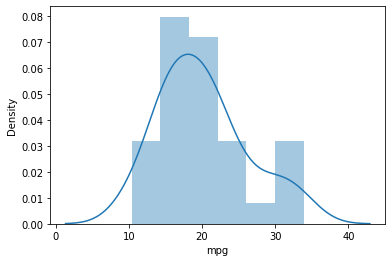

In [118]:
sns.distplot(df['mpg']);

In [121]:
df.columns

Index(['car_model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [135]:
df

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [131]:
df[abs(zscore(df['carb']))>3]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


/home/harsha/Projects/general/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carb', ylabel='Density'>

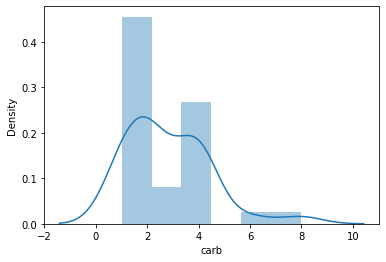

In [136]:
sns.distplot(df['carb'])

In [138]:
carb_mean=df['carb'].mean()
carb_std=df['carb'].std()
print("Card mean ",carb_mean)
print("Card std ",carb_std)

Card mean  2.8125
Card std  1.6151999776318522


In [141]:
df['sample']=[(x-carb_mean)/(carb_std) for x in df['carb']]

/home/harsha/Projects/general/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


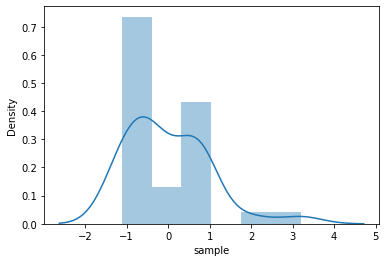

In [143]:
sns.distplot(df['sample']);

In [148]:
df.drop(columns=['sample'],axis=1,inplace=True)

In [149]:
df[abs(zscore(df.iloc[:,1:]))>3]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [157]:
df[(abs(zscore(df.iloc[:,1:]))<3).all(axis=1)]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## Handle Missing values with dropna()

In [159]:
df=pd.read_csv(mt_cars_missing)
df.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,NaN,2.875,*,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_model  32 non-null     object 
 1   mpg        31 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       25 non-null     object 
 4   hp         30 non-null     float64
 5   drat       31 non-null     float64
 6   wt         28 non-null     object 
 7   qsec       20 non-null     object 
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ KB


Since disp,qsec,wt are needs to be in float or integer its there in object so there could be some special characters in the dataset.

In [161]:
df['disp'].value_counts()

275.8    3
225      3
$        2
167.6    2
145      1
350      1
160      1
95.1     1
75.7     1
108      1
304      1
121      1
120.3    1
440      1
120.1    1
360      1
400      1
71.1     1
460      1
Name: disp, dtype: int64

In [162]:
df['qsec'].value_counts()

20.22    2
18.61    2
16.87    1
*        1
14.5     1
17.3     1
17.6     1
17.4     1
17.42    1
15.84    1
18.52    1
-        1
18.9     1
16.46    1
19.9     1
16.9     1
16.7     1
18       1
Name: qsec, dtype: int64

In [163]:
df['wt'].value_counts()

?        2
3.44     2
3.57     2
3.46     2
2.62     1
1.835    1
3.78     1
3.84     1
3.215    1
2.14     1
5.345    1
2.465    1
3.435    1
2.875    1
4.07     1
2.2      1
5.25     1
2.77     1
5.424    1
3.845    1
1.615    1
2.32     1
3.17     1
2.78     1
Name: wt, dtype: int64

In [166]:
df['wt']=df['wt'].apply(lambda x:np.nan if x in ['*','?','-','$'] else x)
df['disp']=df['disp'].apply(lambda x:np.nan if x in ['*','?','-','$'] else x)
df['qsec']=df['qsec'].apply(lambda x:np.nan if x in ['*','?','-','$'] else x)

In [170]:
for i in ['wt','disp','qsec']:
    print(df[i].value_counts(dropna=False))

NaN      6
3.57     2
3.44     2
3.46     2
3.78     1
3.84     1
3.215    1
2.14     1
1.615    1
2.465    1
3.435    1
2.62     1
2.78     1
2.875    1
4.07     1
2.2      1
5.345    1
2.77     1
5.424    1
3.845    1
5.25     1
2.32     1
3.17     1
1.835    1
Name: wt, dtype: int64
NaN      9
275.8    3
225      3
167.6    2
145      1
350      1
160      1
95.1     1
75.7     1
108      1
304      1
121      1
120.3    1
440      1
120.1    1
360      1
400      1
71.1     1
460      1
Name: disp, dtype: int64
NaN      14
20.22     2
18.61     2
16.7      1
16.46     1
19.9      1
16.87     1
15.84     1
18.9      1
17.42     1
16.9      1
17.4      1
17.6      1
18.52     1
14.5      1
18        1
17.3      1
Name: qsec, dtype: int64


In [171]:
df.isna().sum() #check how many null values are present in the dataset.

car_model     0
mpg           1
cyl           0
disp          9
hp            2
drat          1
wt            6
qsec         14
vs            0
am            0
gear          0
carb          0
dtype: int64

In [174]:
df.dropna(inplace=True) #dropping null values from the dataset.

In [175]:
df.isna().sum() #valdating whether the null values are present or not.

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [176]:
df.dropna(thresh=10,axis=1) #retain records based on the threshold.

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
10,Merc 280C,17.8,6,167.6,123.0,3.92,3.44,18.9,1,0,4,4
11,Merc 450SE,16.4,8,275.8,180.0,3.07,4.07,17.4,0,0,3,3
13,Merc 450SLC,15.2,8,275.8,180.0,3.07,3.78,18,0,0,3,3
16,Chrysler Imperial,14.7,8,440,230.0,3.23,5.345,17.42,0,0,3,4
18,Honda Civic,30.4,4,75.7,52.0,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65.0,4.22,1.835,19.9,1,1,4,1
22,AMC Javelin,15.2,8,304,150.0,3.15,3.435,17.3,0,0,3,2


## Pandas Apply function

In [177]:
df=pd.read_csv(house_price_bangalore)
df.shape

(13320, 9)

In [178]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [180]:
df.loc[:,['area_type','location','society']]

,area_type,location,society
0,Super built-up Area,Electronic City Phase II,Coomee
1,Plot Area,Chikka Tirupathi,Theanmp
2,Built-up Area,Uttarahalli,NaN
3,Super built-up Area,Lingadheeranahalli,Soiewre
4,Super built-up Area,Kothanur,NaN
...,...,...,...
13315,Built-up Area,Whitefield,ArsiaEx
13316,Super built-up Area,Richards Town,NaN
13317,Built-up Area,Raja Rajeshwari Nagar,Mahla T
13318,Super built-up Area,Padmanabhanagar,SollyCl


In [187]:
df['location'].value_counts(dropna=False)

Whitefield          540
Sarjapur  Road      399
Electronic City     302
Kanakpura Road      273
Thanisandra         234
                   ... 
Chickpet              1
DUO Layout            1
High grounds          1
Shettihalli           1
Prestige Sunrise      1
Name: location, Length: 1306, dtype: int64

In [189]:
df['location'].fillna(method='ffill',inplace=True)

In [185]:
df['society'].fillna('NONE',inplace=True)

In [190]:
df.loc[:,['area_type','location','society']].isna().sum()

area_type    0
location     0
society      0
dtype: int64

In [194]:
from sklearn.preprocessing import LabelEncoder
lbl_enc=LabelEncoder()
df.loc[:,['area_type','location','society']]=df.loc[:,['area_type','location','society']].apply(lbl_enc.fit_transform)

In [195]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,19-Dec,419,2 BHK,464,1056,2.0,1.0,39.07
1,2,Ready To Move,317,4 Bedroom,2440,2600,5.0,3.0,120.00
2,0,Ready To Move,1179,3 BHK,1346,1440,2.0,3.0,62.00
3,3,Ready To Move,757,3 BHK,2187,1521,3.0,1.0,95.00
4,3,Ready To Move,716,2 BHK,1346,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,0,Ready To Move,1252,5 Bedroom,209,3453,4.0,0.0,231.00
13316,3,Ready To Move,1004,4 BHK,1346,3600,5.0,NaN,400.00
13317,0,Ready To Move,972,2 BHK,1216,1141,2.0,1.0,60.00
13318,3,18-Jun,907,4 BHK,2206,4689,4.0,1.0,488.00


## Pandas set option for formatting.change default max_columns

In [196]:
df=pd.read_csv(breast_cancer)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [197]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

In [198]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


## Extract Month & Year  as seperate columns  from Pandas Date column.

In [199]:
df=pd.read_csv(superstores_order)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [209]:
df['order_date']=pd.to_datetime(df['order_date'],format='%Y-%m-%d')
df['ship_date']=pd.to_datetime(df['ship_date'],format='%Y-%m-%d')

In [213]:
df['order_year']=df['order_date'].apply(lambda x:x.year)
df['order_month']=df['order_date'].apply(lambda x:x.month)
df['order_day']=df['order_date'].apply(lambda x:x.day)

In [222]:
df.pivot_table(index='order_year',columns=['category','sub_category'],values='sales',aggfunc='count')

category     Furniture                           Office Supplies               \
sub_category Bookcases Chairs Furnishings Tables      Appliances  Art Binders   
order_year                                                                      
2015                37    129         184     71              93  164     290   
2016                61    133         200     58              94  167     318   
2017                54    165         257     86             114  183     415   
2018                76    190         316    104             165  282     500   

category                                                        Technology  \
sub_category Envelopes Fasteners Labels Paper Storage Supplies Accessories   
order_year                                                                   
2015                54        50     76   273     177       40         148   
2016                67        44     77   272     171       31         166   
2017                62        59     97   366     210       60         186   
2018                71        64    114   459     288       59         275   

category                              
sub_category Copiers Machines Phones  
order_year                            
2015              10       26    171  
2016              20       24    199  
2017              16       32    225  
2018              22       33    294

In [219]:
df[['category','sub_category']]

,category,sub_category
0,Furniture,Bookcases
1,Furniture,Chairs
2,Office Supplies,Labels
3,Furniture,Tables
4,Office Supplies,Storage
...,...,...
9989,Furniture,Furnishings
9990,Furniture,Furnishings
9991,Technology,Phones
9992,Office Supplies,Paper


In [221]:
df.groupby('category')['sub_category'].count()

category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: sub_category, dtype: int64

## Percentage change function in Pandas Dataframe.

In [229]:
df.pivot_table(index='order_year',columns=['category'],values='profit',aggfunc='sum').pct_change()*100

category,Furniture,Office Supplies,Technology
order_year,,,
2015,NaN,NaN,NaN
2016,-44.753489,11.092248,55.883907
2017,130.828682,39.688767,18.714631
2018,-56.632017,13.334936,27.430650


## Correlation matrix plot pandas dataframe.

In [230]:
df=pd.read_csv(breast_cancer)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [235]:
df.corr().style.background_gradient(cmap='coolwarm')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


## Import number column as string.

In [241]:
df=pd.read_csv(superstores_order,dtype={'postal_code':object})
df.tail()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2018-119914,2018-05-04,2018-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9983 non-null   object 
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub_category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

## Read date clumn from data as index in Dataframes

In [251]:
df=pd.read_csv(car_sales,index_col=0,parse_dates=['Month'])
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


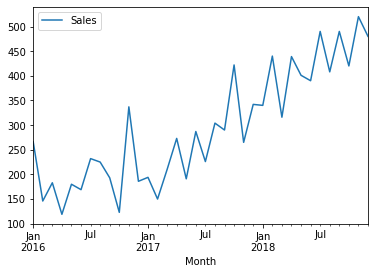

In [255]:
df.plot();

## Read data only specific columns

In [261]:
df=pd.read_csv(adult,usecols=['age','workclass','education','category'])

In [262]:
df

,age,workclass,education,category
0,39,State-gov,Bachelors,<=50K
1,50,Self-emp-not-inc,Bachelors,<=50K
2,38,Private,HS-grad,<=50K
3,53,Private,11th,<=50K
4,28,Private,Bachelors,<=50K
...,...,...,...,...
32556,27,Private,Assoc-acdm,<=50K
32557,40,Private,HS-grad,>50K
32558,58,Private,HS-grad,<=50K
32559,22,Private,HS-grad,<=50K


## Find percentage of records with missing values.

In [264]:
df=pd.read_csv(mt_cars_missing)
df

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,NaN,2.875,*,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,NaN,20.22,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,NaN,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,NaN,1,0,4,4


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_model  32 non-null     object 
 1   mpg        31 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       25 non-null     object 
 4   hp         30 non-null     float64
 5   drat       31 non-null     float64
 6   wt         28 non-null     object 
 7   qsec       20 non-null     object 
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ KB


In [266]:
df.loc[:,['disp','qsec','wt']].isna().sum()

disp     7
qsec    12
wt       4
dtype: int64

In [270]:
print(df['disp'].value_counts(dropna=False))
df['disp']=df['disp'].apply(lambda x:x if x not in ['$'] else np.nan)
print(df['disp'].value_counts(dropna=False))

NaN      9
275.8    3
225      3
167.6    2
145      1
350      1
160      1
95.1     1
75.7     1
108      1
304      1
121      1
120.3    1
440      1
120.1    1
360      1
400      1
71.1     1
460      1
Name: disp, dtype: int64
NaN      9
275.8    3
225      3
167.6    2
145      1
350      1
160      1
95.1     1
75.7     1
108      1
304      1
121      1
120.3    1
440      1
120.1    1
360      1
400      1
71.1     1
460      1
Name: disp, dtype: int64


In [272]:
print(df['qsec'].value_counts(dropna=False))
df['qsec']=df['qsec'].apply(lambda x:x if x not in ['$','-','*'] else np.nan)
print(df['qsec'].value_counts(dropna=False))

NaN      12
20.22     2
18.61     2
15.84     1
14.5      1
17.3      1
17.6      1
17.4      1
17.42     1
18.52     1
16.87     1
-         1
18.9      1
16.46     1
19.9      1
16.9      1
16.7      1
*         1
18        1
Name: qsec, dtype: int64
NaN      14
20.22     2
18.61     2
16.7      1
16.46     1
19.9      1
16.87     1
15.84     1
18.9      1
17.42     1
16.9      1
17.4      1
17.6      1
18.52     1
14.5      1
18        1
17.3      1
Name: qsec, dtype: int64


In [274]:
print(df['wt'].value_counts(dropna=False))
df['wt']=df['wt'].apply(lambda x:x if x not in ['$','-','*','?'] else np.nan)
print(df['wt'].value_counts(dropna=False))

NaN      4
3.44     2
3.57     2
?        2
3.46     2
2.32     1
3.435    1
1.835    1
3.78     1
3.84     1
3.215    1
2.14     1
5.345    1
2.465    1
2.62     1
3.17     1
2.78     1
2.875    1
2.2      1
5.25     1
2.77     1
5.424    1
3.845    1
1.615    1
4.07     1
Name: wt, dtype: int64
NaN      6
3.57     2
3.44     2
3.46     2
3.78     1
3.84     1
3.215    1
2.14     1
1.615    1
2.465    1
3.435    1
2.62     1
2.78     1
2.875    1
4.07     1
2.2      1
5.345    1
2.77     1
5.424    1
3.845    1
5.25     1
2.32     1
3.17     1
1.835    1
Name: wt, dtype: int64


In [284]:
df.isna().sum()

car_model     0
mpg           1
cyl           0
disp          9
hp            2
drat          1
wt            6
qsec         14
vs            0
am            0
gear          0
carb          0
dtype: int64

In [283]:
null_df=pd.DataFrame((df.isna().sum()/df.shape[0])*100,index=(df.isna().sum()/df.shape[0]).index,columns=['Percentage_of_Nulls'])
null_df.style.background_gradient('viridis')

,Percentage_of_Nulls
car_model,0.000000
mpg,3.125000
cyl,0.000000
disp,28.125000
hp,6.250000
drat,3.125000
wt,18.750000
qsec,43.750000
vs,0.000000
am,0.000000


##  Reading multiple Files.

In [289]:
df=pd.read_csv(SOURCE_PATH+'/log-15feb18.txt')

In [290]:
df

,IP,Time,URL,Staus
0,10.128.2.1,15/Feb/2018:03:10:38,GET /home.php HTTP/1.1,302
1,10.128.2.1,15/Feb/2018:03:10:38,GET /login.php HTTP/1.1,200
2,10.128.2.1,15/Feb/2018:03:10:39,GET /css/bootstrap.min.css HTTP/1.1,200
3,10.131.0.1,15/Feb/2018:03:10:39,GET /css/font-awesome.min.css HTTP/1.1,200
4,10.130.2.1,15/Feb/2018:03:10:39,GET /css/normalize.css HTTP/1.1,200
5,10.128.2.1,15/Feb/2018:03:10:39,GET /css/main.css HTTP/1.1,200
6,10.131.0.1,15/Feb/2018:03:10:39,GET /css/style.css HTTP/1.1,200
7,10.130.2.1,15/Feb/2018:03:10:39,GET /js/vendor/modernizr-2.8.3.min.js HTTP/1.1,200
8,10.130.2.1,15/Feb/2018:03:10:39,GET /js/vendor/jquery-1.12.0.min.js HTTP/1.1,200
9,10.131.0.1,15/Feb/2018:03:10:39,GET /bootstrap-3.3.7/js/bootstrap.min.js HTTP/1.1,200


In [296]:
from glob import glob
log_files=glob(SOURCE_PATH+'/'+'log*')
log_files

['/home/harsha/Downloads/pandas-master/log-15feb18.txt',
 '/home/harsha/Downloads/pandas-master/log-18feb18.txt',
 '/home/harsha/Downloads/pandas-master/log-17feb18.txt',
 '/home/harsha/Downloads/pandas-master/log-16feb18.txt',
 '/home/harsha/Downloads/pandas-master/log-19feb18.txt']

In [298]:
log_files.sort()

In [307]:
concat_df=pd.concat((pd.read_csv(file) for file in log_files),ignore_index=True)

In [309]:
concat_df

,IP,Time,URL,Staus
0,10.128.2.1,15/Feb/2018:03:10:38,GET /home.php HTTP/1.1,302
1,10.128.2.1,15/Feb/2018:03:10:38,GET /login.php HTTP/1.1,200
2,10.128.2.1,15/Feb/2018:03:10:39,GET /css/bootstrap.min.css HTTP/1.1,200
3,10.131.0.1,15/Feb/2018:03:10:39,GET /css/font-awesome.min.css HTTP/1.1,200
4,10.130.2.1,15/Feb/2018:03:10:39,GET /css/normalize.css HTTP/1.1,200
...,...,...,...,...
179,10.130.2.1,19/Feb/2018:19:51:59,GET /js/vendor/moment.min.js HTTP/1.1,200
180,10.130.2.1,19/Feb/2018:19:52:06,GET /compiler.php HTTP/1.1,200
181,10.130.2.1,19/Feb/2018:19:52:24,POST /compile.php HTTP/1.1,200
182,10.128.2.1,19/Feb/2018:23:38:38,GET / HTTP/1.1,302


## Rearrange numerical and categorical columns

In [322]:
df=pd.read_csv(adult)
df

,age,workclass,fnlwgt,education,educationNum,marital,occupation,relationship,race,sex,capGain,capLoss,HoursWeek,NativeCountry,category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [323]:
df.select_dtypes(include='object')

,workclass,education,marital,occupation,relationship,race,sex,NativeCountry,category
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [324]:
df.select_dtypes(exclude='object')

,age,fnlwgt,educationNum,capGain,capLoss,HoursWeek
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [325]:
df_concat=pd.concat([df.select_dtypes(include='object'),df.select_dtypes(exclude='object')],axis=1)
df_concat

,workclass,education,marital,occupation,relationship,race,sex,NativeCountry,category,age,fnlwgt,educationNum,capGain,capLoss,HoursWeek
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,39,77516,13,2174,0,40
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,50,83311,13,0,0,13
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,38,215646,9,0,0,40
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,53,234721,7,0,0,40
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,27,257302,12,0,0,38
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,40,154374,9,0,0,40
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,58,151910,9,0,0,40
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,22,201490,9,0,0,20


## Label Encoding multiple columns.

In [326]:
from sklearn.preprocessing import LabelEncoder

In [327]:
df.select_dtypes('object').columns

Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'sex', 'NativeCountry', 'category'],
      dtype='object')

In [328]:
lbl_enc=LabelEncoder()
df_concat.loc[:,list(df.select_dtypes('object').columns)]=df_concat.loc[:,list(df.select_dtypes('object').columns)].apply(lbl_enc.fit_transform)

In [329]:
df_concat

,workclass,education,marital,occupation,relationship,race,sex,NativeCountry,category,age,fnlwgt,educationNum,capGain,capLoss,HoursWeek
0,7,9,4,1,1,4,1,39,0,39,77516,13,2174,0,40
1,6,9,2,4,0,4,1,39,0,50,83311,13,0,0,13
2,4,11,0,6,1,4,1,39,0,38,215646,9,0,0,40
3,4,1,2,6,0,2,1,39,0,53,234721,7,0,0,40
4,4,9,2,10,5,2,0,5,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,0,39,0,27,257302,12,0,0,38
32557,4,11,2,7,0,4,1,39,1,40,154374,9,0,0,40
32558,4,11,6,1,4,4,0,39,0,58,151910,9,0,0,40
32559,4,11,4,1,3,4,1,39,0,22,201490,9,0,0,20


## Finding correaltion between features and target variable

In [331]:
df=pd.read_csv(breast_cancer)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [333]:
df_corr=df.corr()

In [336]:
df_corr['outcome'].sort_values(ascending=False)

outcome                    1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
symmetry error            -0

## Replace Special Chars in column names with '_'

In [337]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [338]:
df.rename(columns={'mean radius':'mean $radius'},inplace=True)

In [340]:
df.head()

,mean $radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [345]:
df.columns=df.columns.str.replace('\W+','_')

<ipython-input-345-cb8617cd8e83>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns=df.columns.str.replace('\W+','_')


In [346]:
df['radius_error']

0      1.0950
1      0.5435
2      0.7456
3      0.4956
4      0.7572
        ...  
564    1.1760
565    0.7655
566    0.4564
567    0.7260
568    0.3857
Name: radius_error, Length: 569, dtype: float64